This is the first project Sue and Alex worked on together. In this project, we analyzed the importance of different features when deciding whether the personal risk of someone is good or bad, and built models to predict the risk categories. It is written on February 3rd.

# 1 set environment

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble  import RandomForestRegressor as rfr

# **2 data processing**

## 2.1 import data

We are using a german credit risk dataset downloaded from Kaggle. Link: https://www.kaggle.com/kabure/german-credit-data-with-risk

In [99]:
from google.colab import files
files.upload()

Saving german_credit_data.csv to german_credit_data (1).csv


{'german_credit_data.csv': b',Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk\n0,67,male,2,own,NA,little,1169,6,radio/TV,good\n1,22,female,2,own,little,moderate,5951,48,radio/TV,bad\n2,49,male,1,own,little,NA,2096,12,education,good\n3,45,male,2,free,little,little,7882,42,furniture/equipment,good\n4,53,male,2,free,little,little,4870,24,car,bad\n5,35,male,1,free,NA,NA,9055,36,education,good\n6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment,good\n7,35,male,3,rent,little,moderate,6948,36,car,good\n8,61,male,1,own,rich,NA,3059,12,radio/TV,good\n9,28,male,3,own,little,moderate,5234,30,car,bad\n10,25,female,2,rent,little,moderate,1295,12,car,bad\n11,24,female,2,rent,little,little,4308,48,business,bad\n12,22,female,2,own,little,moderate,1567,12,radio/TV,good\n13,60,male,1,own,little,little,1199,24,car,bad\n14,28,female,2,rent,little,little,1403,15,car,good\n15,32,female,1,own,moderate,little,1282,24,radio/TV,bad\n16,53,male,2,own,NA,NA,2424,24,

In [0]:
credit_data=pd.read_csv('german_credit_data.csv')

## 2.2 a brief overview

In [101]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [102]:
credit_data.shape

(1000, 11)

## 2.3 data cleaning

In [0]:
credit_data=credit_data.drop(columns='Unnamed: 0')

In [0]:
credit_data.rename(columns={'Saving accounts':'Saving_Accounts','Checking account':'Checking_Account','Credit amount':'Credit_Amount'},inplace=True)

In [212]:
credit_data.head()

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


We want to remove the rows with NAN.

In [213]:
credit_data_dropna=credit_data.dropna(how='any')
credit_data_dropna.shape

(522, 10)

We want to inspect the values of different columns.

In [214]:
credit_data_dropna.Saving_Accounts.unique()

array(['little', 'moderate', 'quite rich', 'rich'], dtype=object)

In [215]:
credit_data_dropna.Checking_Account.unique()

array(['moderate', 'little', 'rich'], dtype=object)

In [216]:
credit_data_dropna.Purpose.unique()

array(['radio/TV', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others', 'education'],
      dtype=object)

In [217]:
credit_data_dropna.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [218]:
credit_data_dropna.Risk.unique()

array(['bad', 'good'], dtype=object)

We want to transfer text data into numeric data.

In [219]:
credit_data_dropna.Risk=credit_data_dropna.Risk.map({'good': 1, 'bad': 0})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [220]:
credit_data_dropna.Saving_Accounts=credit_data_dropna.Saving_Accounts.map({'little':0,'moderate':1,'rich':2,'quite rich':3})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [221]:
credit_data_dropna.Checking_Account=credit_data_dropna.Checking_Account.map({'little':0,'moderate':1,'rich':2})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Here we have finished the data cleaning part. Let's have a look at our cleaned dataframe.

In [222]:
credit_data_dropna.head()

,Age,Sex,Job,Housing,Saving_Accounts,Checking_Account,Credit_Amount,Duration,Purpose,Risk
1,22,female,2,own,0,1,5951,48,radio/TV,0
3,45,male,2,free,0,0,7882,42,furniture/equipment,1
4,53,male,2,free,0,0,4870,24,car,0
7,35,male,3,rent,0,1,6948,36,car,1
9,28,male,3,own,0,1,5234,30,car,0


# 3 data visualization

## 3.1 boxplots of different features

In [0]:
risk_good = credit_data_dropna[credit_data_dropna["Risk"] ==1]
risk_bad = credit_data_dropna[credit_data_dropna["Risk"] ==0]

Text(0.5, 1.0, 'boxplot of age when risk is bad')

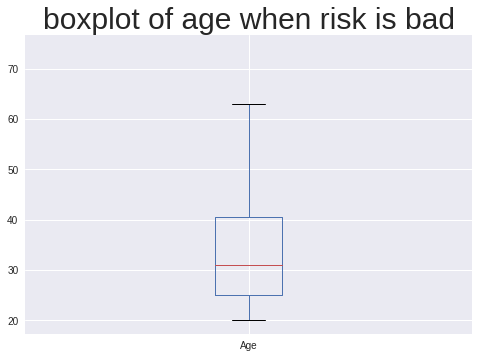

In [382]:
# basic plot
risk_bad.boxplot(column=['Age'])
plt.title('boxplot of age when risk is bad',size=30)

Text(0.5, 1.0, 'boxplot of age when risk is good')

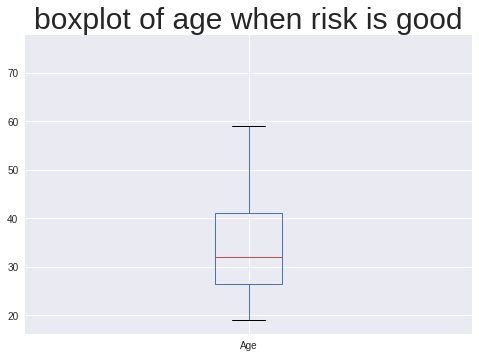

In [383]:
# basic plot
risk_good.boxplot(column=['Age'])
plt.title('boxplot of age when risk is good',size=30)

Text(0.5, 1.0, 'boxplot of Credit Amount when risk is good')

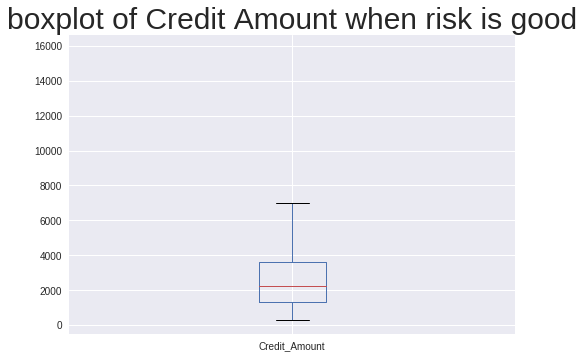

In [384]:
risk_good.boxplot(column=['Credit_Amount'])
plt.title('boxplot of Credit Amount when risk is good',size=30)

Text(0.5, 1.0, 'boxplot of Credit Amount when risk is bad')

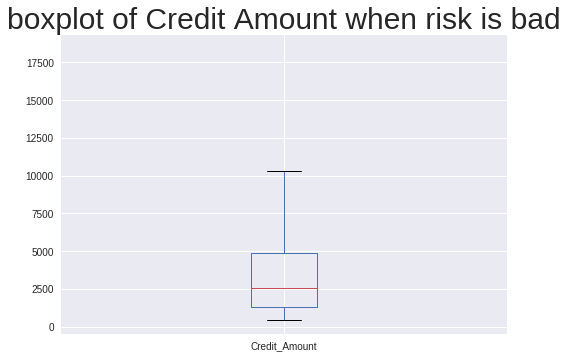

In [385]:
risk_bad.boxplot(column=['Credit_Amount'])
plt.title('boxplot of Credit Amount when risk is bad',size=30)

Text(0.5, 1.0, 'boxplot of Duration when risk is bad')

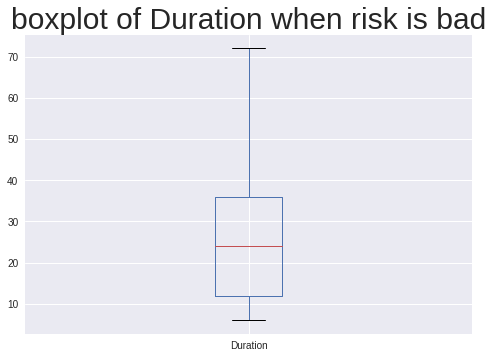

In [386]:
risk_bad.boxplot(column=['Duration'])
plt.title('boxplot of Duration when risk is bad',size=30)

Text(0.5, 1.0, 'boxplot of Duration when risk is good')

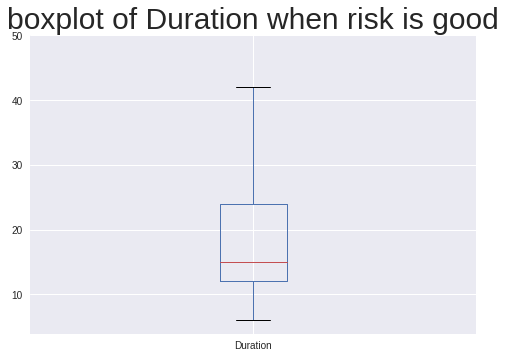

In [387]:
risk_good.boxplot(column=['Duration'])
plt.title('boxplot of Duration when risk is good',size=30)

## 3.2 pairplots of different features

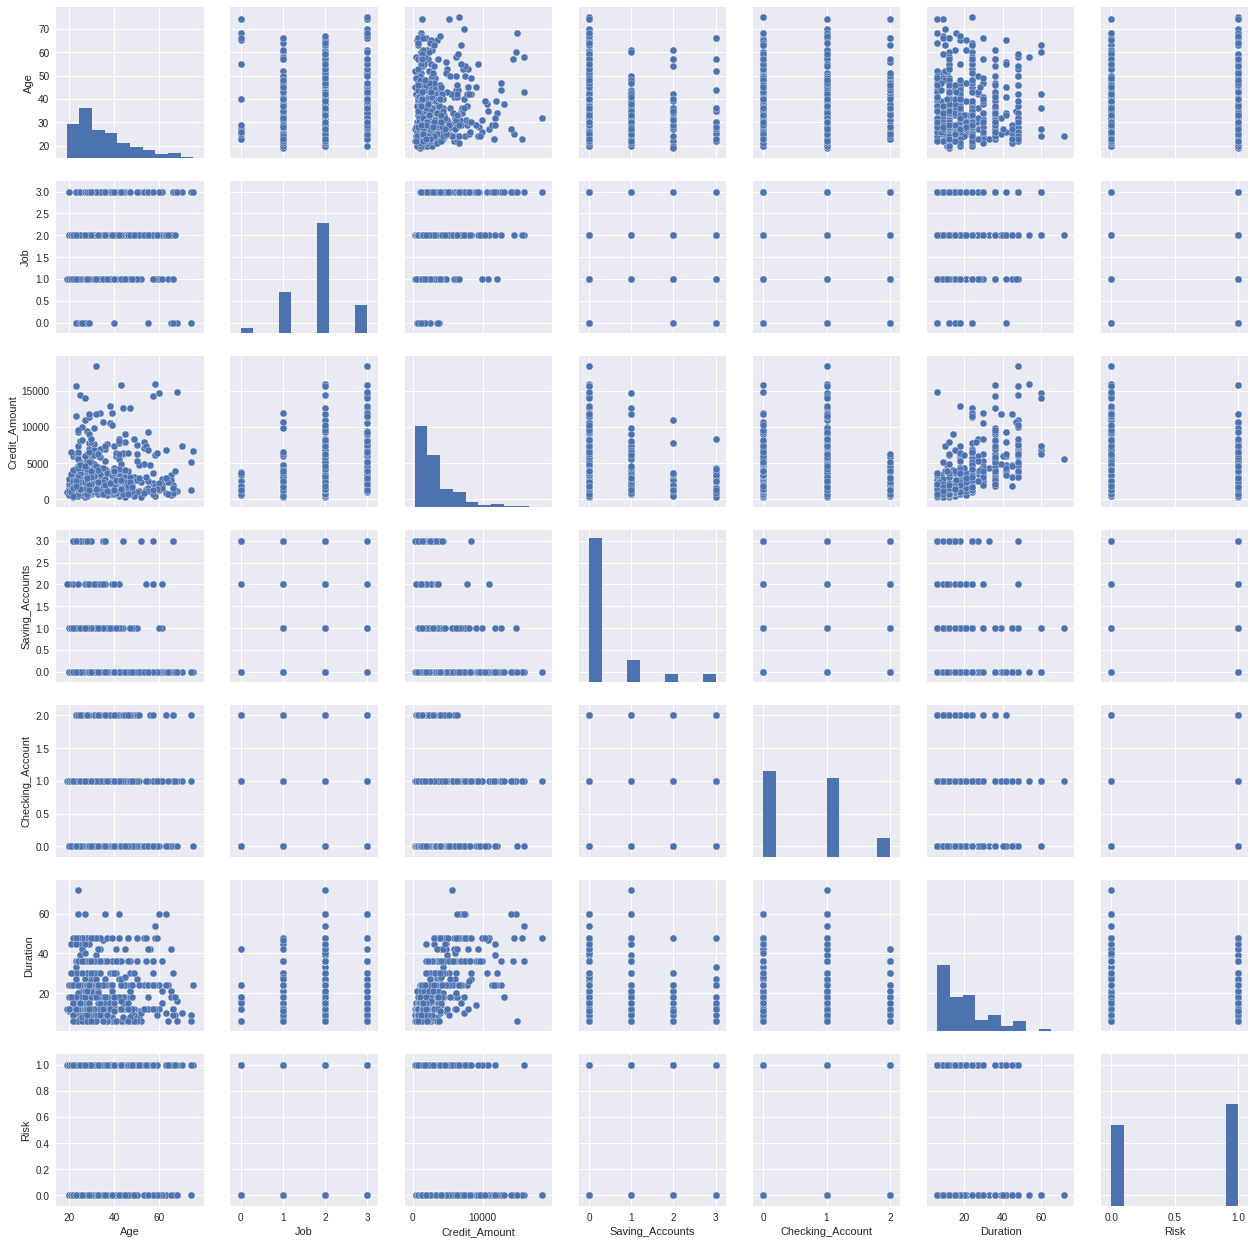

In [224]:
import seaborn as sns
sns.pairplot(credit_data_dropna[['Age','Job','Credit_Amount','Saving_Accounts','Checking_Account','Duration','Risk']], size=2.5);

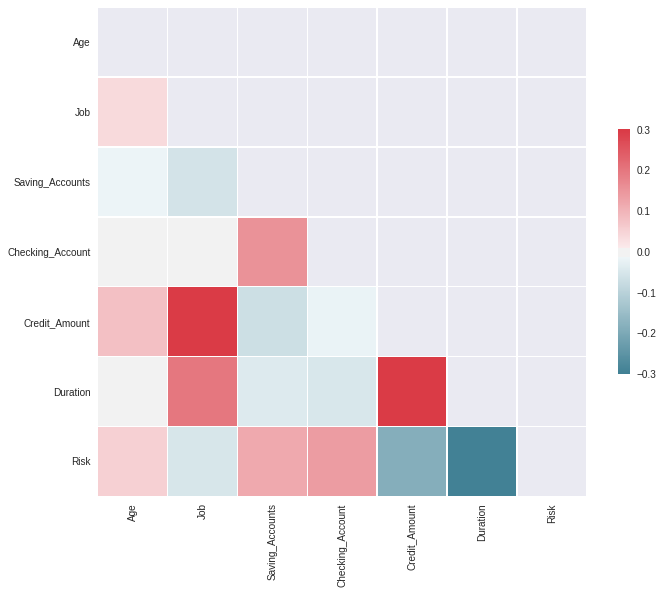

In [225]:
corr =credit_data_dropna.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 4 build machine learning models on the data

First standardize the data before building models.

In [394]:
StandardScaler().fit_transform(credit_data_dropna.loc[:,['Age','Job','Credit_Amount','Saving_Accounts','Checking_Account','Duration']])

array([[-1.09444711,  0.18254035,  0.9131705 , -0.45111638,  0.55730188,
         2.13935578],
       [ 0.85857489,  0.18254035,  1.57303731, -0.45111638, -0.9578626 ,
         1.65789696],
       [ 1.53788689,  0.18254035,  0.54376811, -0.45111638, -0.9578626 ,
         0.21352053],
       ...,
       [ 0.43400489,  1.64847973,  0.19760287, -0.45111638, -0.9578626 ,
         0.69497934],
       [-1.00953311,  0.18254035, -0.48994349, -0.45111638, -0.9578626 ,
         1.89862637],
       [-0.66987711,  0.18254035,  0.44330159,  0.86442971,  0.55730188,
         1.89862637]])

In [0]:
standardized=credit_data_dropna.loc[:,['Age','Job','Credit_Amount','Saving_Accounts','Checking_Account','Duration','Risk']]

## 4.1 linear regression

In [0]:
lm = smf.ols(formula='Risk ~Age+Job+Credit_Amount+Saving_Accounts+Checking_Account+Duration', data=standardized).fit()

In [401]:
lm.params

Intercept           0.557471
Age                 0.029001
Job                 0.007472
Credit_Amount      -0.007013
Saving_Accounts     0.044771
Checking_Account    0.056027
Duration           -0.138636
dtype: float64

In [402]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Risk   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     10.99
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.53e-11
Time:                        00:18:06   Log-Likelihood:                -343.94
No. Observations:                 522   AIC:                             701.9
Df Residuals:                     515   BIC:                             731.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5575      0.021     27.053      0.000       0.517       0.598
Age                  0.0290      0.021      1.400      0.162      -0.012       0.070
Job                  0.0075      0.022      0.341      0.733      -0.036       0.050
Credit_Amount       -0.0070      0.027     -0.257      0.797      -0.061       0.047
Saving_Accounts      0.0448      0.021      2.140      0.033       0.004       0.086
Checking_Account     0.0560      0.021      2.682      0.008       0.015       0.097
Duration            -0.1386      0.026     -5.297      0.000      -0.190      -0.087
==============================================================================
Omnibus:                        5.156   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.076   Jarque-Bera (JB):               55.302
Skew:                          -0.243   Prob(JB):                     9.80e-13
Kurtosis:                       1.482   Cond. No.                         2.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How Well Does the Model Fit the data?

compute r-squared

In [403]:
# print the R-squared value for the model 1
lm.rsquared

0.11353410452623147

compute rmse

In [405]:
from sklearn.model_selection import train_test_split
X = standardized.loc[:,['Age','Job','Credit_Amount','Saving_Accounts','Checking_Account','Duration']]
y =standardized.loc[:,['Risk']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm1 = LinearRegression()

# Fit Model
lm1.fit(X_train, y_train)

# Predict
y_pred = lm1.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.48172222921051655


##4.2 random forest

In [406]:
# Split data
X = standardized.loc[:,['Age','Job','Credit_Amount','Saving_Accounts','Checking_Account','Duration']]
y =standardized.Risk

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
func=rfr()
func.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [407]:
y_pred  == func.predict(X_test)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [408]:
func.score(X,y,sample_weight=None)

0.5749203373945642

In [0]:
features= X
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [410]:
# Get numerical feature importances
importances = list(func.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Credit_Amount        Importance: 0.44
Variable: Age                  Importance: 0.2
Variable: Duration             Importance: 0.18
Variable: Job                  Importance: 0.07
Variable: Checking_Account     Importance: 0.06
Variable: Saving_Accounts      Importance: 0.05


It seems credit amount is the most important variable to be taken into consideration when classifying risk categories.

## 4.3 logistic regression

In [411]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**The logistic regression model achieved an accuracy of 0.63.**

##4.4  neural network

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1])
X = OneHotEncoder(categories='auto').fit_transform(X).toarray()
X = X[:, :]

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#Initializing Neural Network
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=2, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [0]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [363]:
# Fitting our model 
history=classifier.fit(X_train[:341],y_train[:341],epochs=600,batch_size=60,validation_data=(X_train[341:],y_train[341:]))

Train on 341 samples, validate on 50 samples
Epoch 1/600
341/341 [==============================] - 1s 4ms/step - loss: 0.6930 - acc: 0.5601 - val_loss: 0.6933 - val_acc: 0.4600
Epoch 2/600
341/341 [==============================] - 0s 53us/step - loss: 0.6928 - acc: 0.5572 - val_loss: 0.6935 - val_acc: 0.4600
Epoch 3/600
341/341 [==============================] - 0s 36us/step - loss: 0.6925 - acc: 0.5572 - val_loss: 0.6937 - val_acc: 0.4600
Epoch 4/600
341/341 [==============================] - 0s 37us/step - loss: 0.6923 - acc: 0.5572 - val_loss: 0.6939 - val_acc: 0.4600
Epoch 5/600
341/341 [==============================] - 0s 43us/step - loss: 0.6920 - acc: 0.5572 - val_loss: 0.6941 - val_acc: 0.4600
Epoch 6/600
341/341 [==============================] - 0s 36us/step - loss: 0.6917 - acc: 0.5572 - val_loss: 0.6943 - val_acc: 0.4600
Epoch 7/600
341/341 [==============================] - 0s 37us/step - loss: 0.6914 - acc: 0.5572 - val_loss: 0.6944 - val_acc: 0.4600
Epoch 8/600
341/34

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [366]:
cm

array([[23, 30],
       [26, 52]])

In [0]:
history_dict=history.history
loss_values=history_dict['loss']
test_loss_values=history_dict['val_loss']

In [0]:
epochs=range(1,len(loss_values)+1)

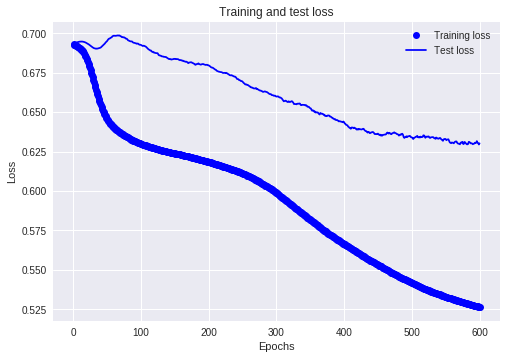

In [369]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,test_loss_values,'b',label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']

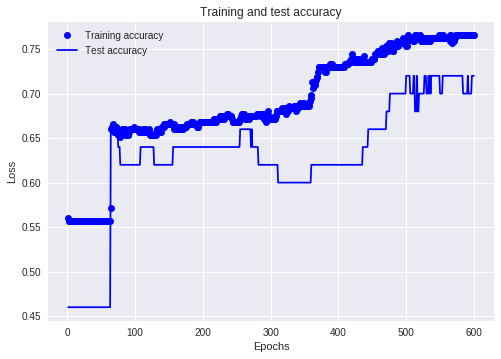

In [371]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**The neural network model achieved an accuracy of approcimately 0.72 after 600 epochs.**

Thank you for reading our project! Best wishes from Sue and Alex.